### Student Information
Name: 高英耀

Student ID: 111062333

GitHub ID: BallPoolShark

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

## 1. Import Libraries and Load Data

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from helpers.data_mining_helpers import tokenize_text
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load the Reddit stock sentiment dataset
df = pd.read_csv('newdataset/Reddit-stock-sentiment.csv')

# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
print(f"\nColumn names:\n{df.columns.tolist()}")
print(f"\nFirst few rows:")
df.head()

Dataset shape: (847, 16)

Column names:
['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url', 'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity', 'polarity', 'sentiment', 'entities', 'label']

First few rows:


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


## 2. Data Preparation and Exploration

In [3]:
# Select only the necessary columns: text and label
# We'll keep subreddit as well for category analysis
df_simplified = df[['text', 'label', 'subreddit']].copy()

# Display dataset info
print(f"Simplified dataset shape: {df_simplified.shape}")
print(f"\nData types:\n{df_simplified.dtypes}")
print(f"\nDataset info:")
df_simplified.info()

Simplified dataset shape: (847, 3)

Data types:
text          object
label        float64
subreddit     object
dtype: object

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   text       847 non-null    object 
 1   label      847 non-null    float64
 2   subreddit  847 non-null    object 
dtypes: float64(1), object(2)
memory usage: 20.0+ KB


In [4]:
# Explore the label distribution
print("Label distribution:")
print(df_simplified['label'].value_counts().sort_index())
print(f"\nLabel distribution percentages:")
print(df_simplified['label'].value_counts(normalize=True).sort_index() * 100)

Label distribution:
label
-1.0    315
 0.0    423
 1.0    109
Name: count, dtype: int64

Label distribution percentages:
label
-1.0    37.190083
 0.0    49.940968
 1.0    12.868949
Name: proportion, dtype: float64


## 3. Data Mining - Missing Values

In [5]:
# Check for missing values by column
print("Missing values by column:")
print(df_simplified.isnull().sum())
print(f"\nTotal missing values: {df_simplified.isnull().sum().sum()}")

# Check for missing values by row
missing_by_row = df_simplified.isnull().any(axis=1).sum()
print(f"\nNumber of rows with at least one missing value: {missing_by_row}")

Missing values by column:
text         0
label        0
subreddit    0
dtype: int64

Total missing values: 0

Number of rows with at least one missing value: 0


In [6]:
# Remove rows with missing values in the 'text' column (most important for text mining)
df_clean = df_simplified.dropna(subset=['text']).copy()

print(f"Original dataset size: {len(df_simplified)}")
print(f"Cleaned dataset size: {len(df_clean)}")
print(f"Rows removed: {len(df_simplified) - len(df_clean)}")

Original dataset size: 847
Cleaned dataset size: 847
Rows removed: 0


## 4. Data Mining - Duplicate Data

In [7]:
# Check for duplicate rows
duplicates = df_clean.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Check for duplicate text entries
duplicate_texts = df_clean.duplicated(subset=['text']).sum()
print(f"Number of duplicate text entries: {duplicate_texts}")

# Remove duplicates based on text column
df_clean = df_clean.drop_duplicates(subset=['text']).copy()
print(f"\nDataset size after removing duplicates: {len(df_clean)}")

Number of duplicate rows: 23
Number of duplicate text entries: 23

Dataset size after removing duplicates: 824


## 5. Data Preprocessing - Sampling

In [8]:
# Create a sample dataset (30% of the data) for faster processing
sample_size = 0.3
df_sample = df_clean.sample(frac=sample_size, random_state=42).copy()

print(f"Original cleaned dataset size: {len(df_clean)}")
print(f"Sample dataset size: {len(df_sample)}")
print(f"Sample percentage: {sample_size * 100}%")

Original cleaned dataset size: 824
Sample dataset size: 247
Sample percentage: 30.0%


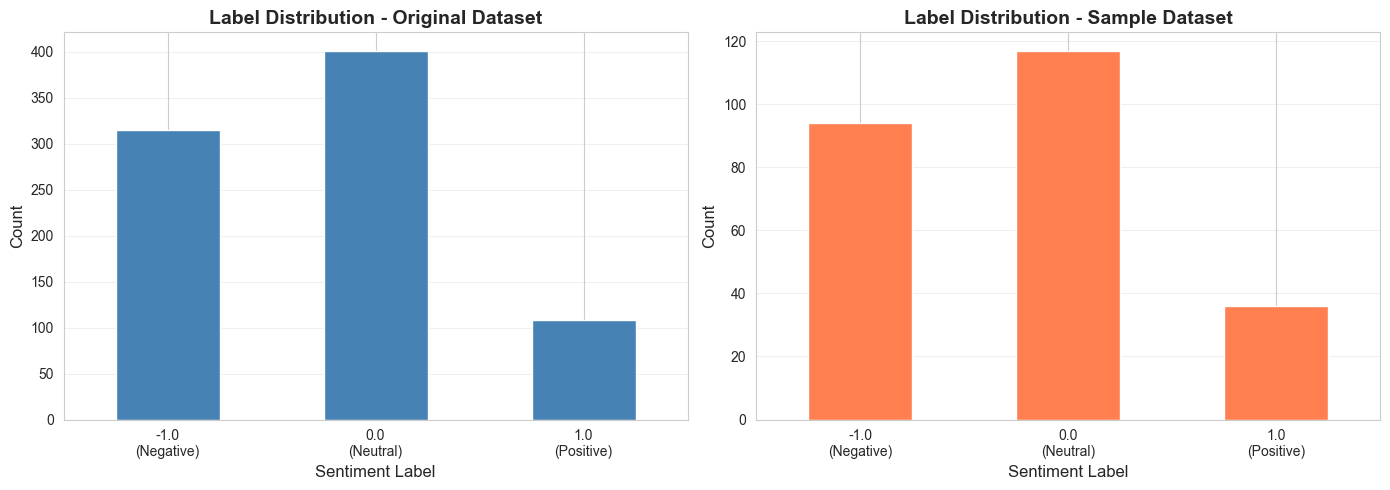


Distribution comparison:
Original dataset:
label
-1.0    38.228155
 0.0    48.665049
 1.0    13.106796
Name: proportion, dtype: float64

Sample dataset:
label
-1.0    38.056680
 0.0    47.368421
 1.0    14.574899
Name: proportion, dtype: float64


In [9]:
# Compare label distributions between original and sample datasets
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Original dataset distribution
df_clean['label'].value_counts().sort_index().plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Label Distribution - Original Dataset', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Sentiment Label', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_xticklabels(['-1.0\n(Negative)', '0.0\n(Neutral)', '1.0\n(Positive)'], rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# Sample dataset distribution
df_sample['label'].value_counts().sort_index().plot(kind='bar', ax=axes[1], color='coral')
axes[1].set_title('Label Distribution - Sample Dataset', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Sentiment Label', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].set_xticklabels(['-1.0\n(Negative)', '0.0\n(Neutral)', '1.0\n(Positive)'], rotation=0)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nDistribution comparison:")
print("Original dataset:")
print(df_clean['label'].value_counts(normalize=True).sort_index() * 100)
print("\nSample dataset:")
print(df_sample['label'].value_counts(normalize=True).sort_index() * 100)

## 6. Feature Creation - Tokenization

In [10]:
# Download required NLTK data
import nltk
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')
    
print("NLTK tokenizer ready!")

NLTK tokenizer ready!


In [11]:
# Tokenize the text data
df_sample['tokens'] = df_sample['text'].apply(lambda x: tokenize_text(str(x)))

# Display example tokenization
print("Example tokenization:")
print(f"\nOriginal text:\n{df_sample.iloc[0]['text'][:200]}...")
print(f"\nTokens:\n{df_sample.iloc[0]['tokens'][:20]}")

Example tokenization:

Original text:
Trump is using “Art of the Deal” tactics.  

Xi is using “Art of War” tactics....

Tokens:
['Trump', 'is', 'using', '“', 'Art', 'of', 'the', 'Deal', '”', 'tactics', '.', 'Xi', 'is', 'using', '“', 'Art', 'of', 'War', '”', 'tactics']


## 7. Feature Subset Selection - Term-Document Matrix

In [12]:
# Create CountVectorizer to build term-document matrix
# We'll limit vocabulary size for efficiency and remove very common/rare words
vectorizer = CountVectorizer(
    max_features=500,  # Limit to top 500 most frequent terms
    min_df=2,          # Word must appear in at least 2 documents
    max_df=0.8,        # Word must appear in less than 80% of documents
    lowercase=True,
    stop_words='english'
)

# Fit and transform the text data
term_doc_matrix = vectorizer.fit_transform(df_sample['text'])

# Get feature names (vocabulary)
feature_names = vectorizer.get_feature_names_out()

print(f"Term-document matrix shape: {term_doc_matrix.shape}")
print(f"Number of documents: {term_doc_matrix.shape[0]}")
print(f"Vocabulary size: {term_doc_matrix.shape[1]}")
print(f"\nFirst 20 features: {feature_names[:20]}")

Term-document matrix shape: (247, 473)
Number of documents: 247
Vocabulary size: 473

First 20 features: ['10' '100' '12' '2025' '30' '4260' '50' '80' 'acquisition' 'actually'
 'adding' 'adjust' 'administration' 'advice' 'affected' 'ago' 'agree'
 'allies' 'allowed' 'amc']


In [13]:
# Convert to dense array for a small sample to visualize
print(f"Matrix is sparse: {term_doc_matrix.nnz / (term_doc_matrix.shape[0] * term_doc_matrix.shape[1]) * 100:.2f}% non-zero")
print(f"Sparse matrix format: {type(term_doc_matrix)}")

# Show example of term-document matrix for first 3 documents and first 10 terms
dense_sample = term_doc_matrix[:3, :10].toarray()
print(f"\nExample term-document matrix (first 3 docs, first 10 terms):")
print(pd.DataFrame(dense_sample, columns=feature_names[:10]))

Matrix is sparse: 1.34% non-zero
Sparse matrix format: <class 'scipy.sparse._csr.csr_matrix'>

Example term-document matrix (first 3 docs, first 10 terms):
   10  100  12  2025  30  4260  50  80  acquisition  actually
0   0    0   0     0   0     0   0   0            0         0
1   0    0   0     0   0     0   0   0            0         0
2   0    0   0     0   0     0   0   0            0         0


## 8. Attribute Transformation - Term Frequency Analysis

In [14]:
# Compute term frequencies across all documents
term_frequencies = np.asarray(term_doc_matrix.sum(axis=0)).flatten()

# Create a dataframe with terms and their frequencies
term_freq_df = pd.DataFrame({
    'term': feature_names,
    'frequency': term_frequencies
}).sort_values('frequency', ascending=False)

print("Top 20 most frequent terms:")
print(term_freq_df.head(20))

Top 20 most frequent terms:
        term  frequency
215     just         31
425    trump         27
61     china         24
228     like         21
252   market         19
166    going         17
408    think         15
285   people         14
396  tariffs         14
441     want         13
264    money         12
414     time         12
112    doesn         11
249     make         11
415    today         11
169     good         11
469     year         11
75   company         10
123  economy         10
108      did         10


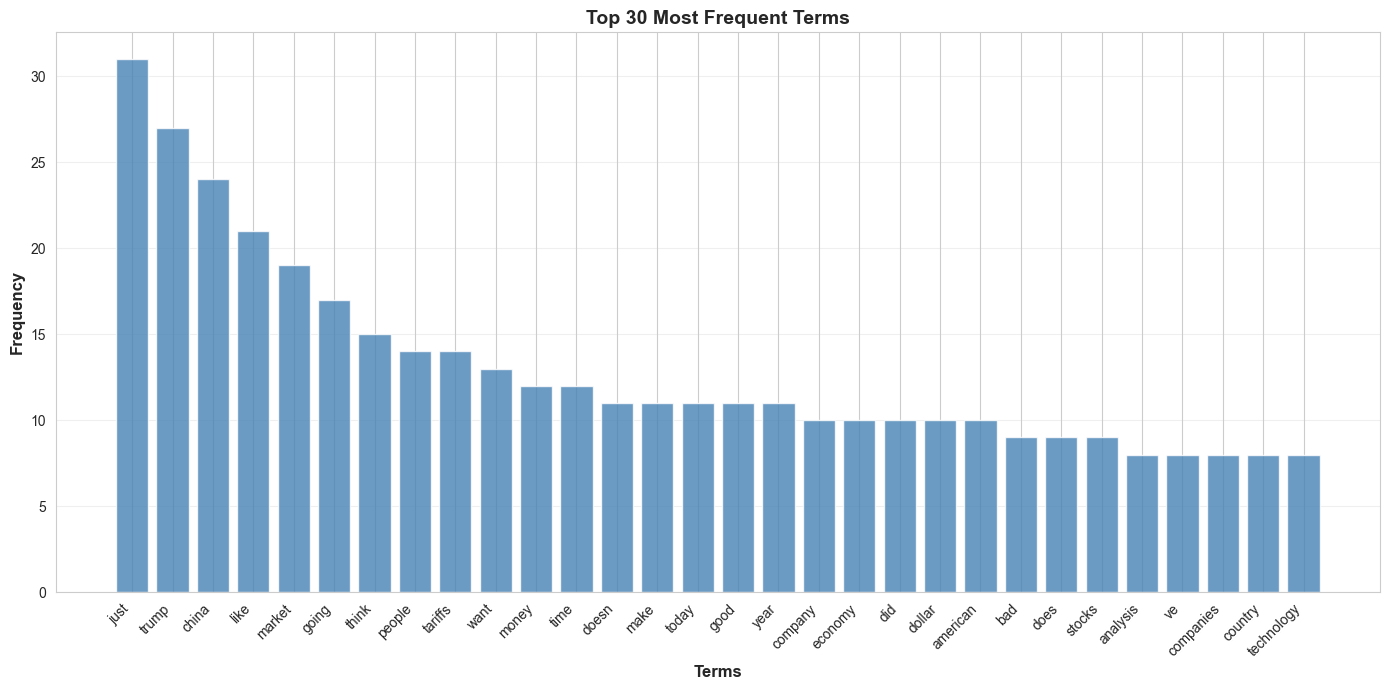

In [15]:
# Visualize top 30 terms with bar chart
top_n = 30
top_terms = term_freq_df.head(top_n)

plt.figure(figsize=(14, 7))
plt.bar(range(top_n), top_terms['frequency'], color='steelblue', alpha=0.8)
plt.xticks(range(top_n), top_terms['term'], rotation=45, ha='right')
plt.xlabel('Terms', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title(f'Top {top_n} Most Frequent Terms', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

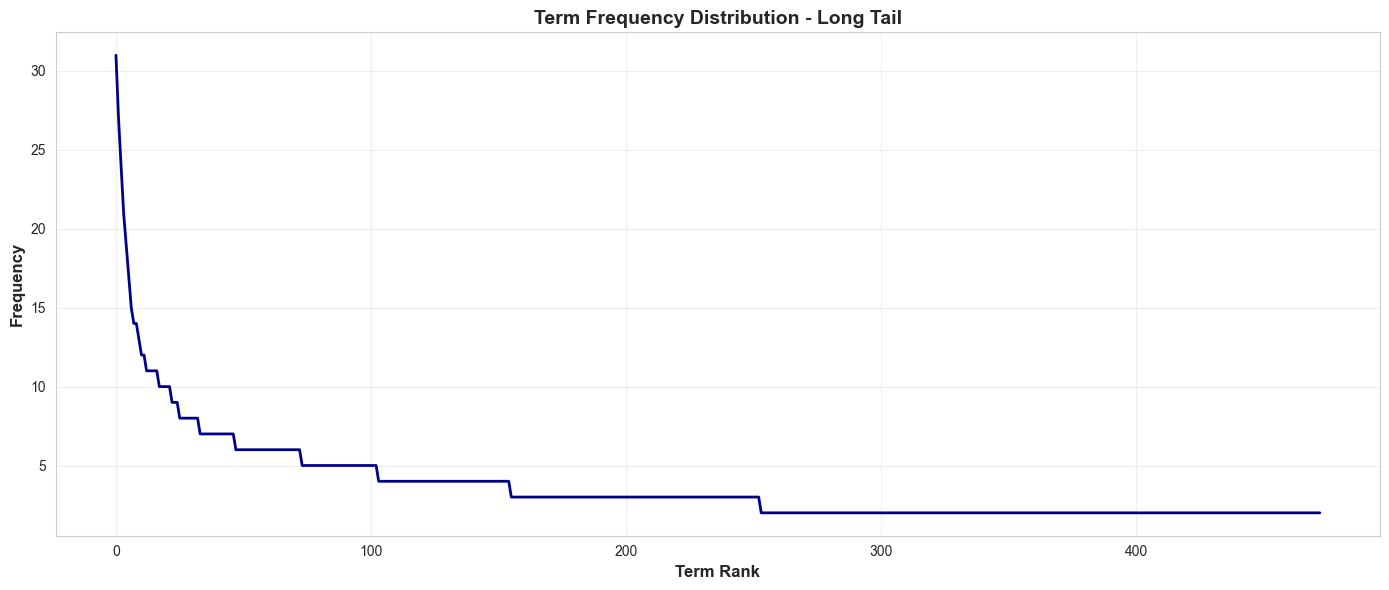

This demonstrates the 'long tail' distribution where few terms are very frequent,
and most terms appear infrequently.


In [16]:
# Visualize "long tail" distribution - showing all terms
plt.figure(figsize=(14, 6))
plt.plot(range(len(term_freq_df)), term_freq_df['frequency'].values, color='darkblue', linewidth=2)
plt.xlabel('Term Rank', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Term Frequency Distribution - Long Tail', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("This demonstrates the 'long tail' distribution where few terms are very frequent,")
print("and most terms appear infrequently.")

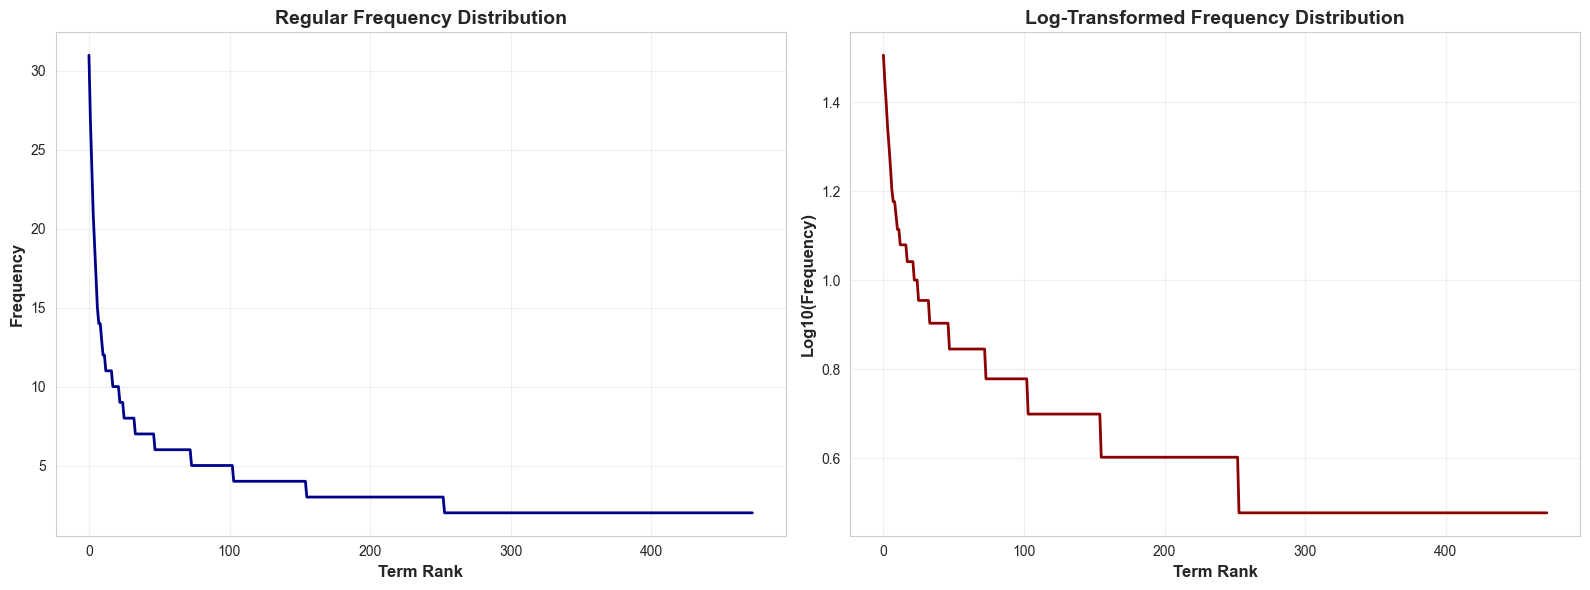

Log transformation helps visualize the distribution better by reducing the
impact of very high frequency terms and making the long tail more visible.


In [17]:
# Apply log transformation to better visualize the distribution
term_freq_df['log_frequency'] = np.log10(term_freq_df['frequency'] + 1)  # Add 1 to avoid log(0)

# Compare regular vs log distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Regular distribution
axes[0].plot(range(len(term_freq_df)), term_freq_df['frequency'].values, color='darkblue', linewidth=2)
axes[0].set_xlabel('Term Rank', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0].set_title('Regular Frequency Distribution', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)

# Log distribution
axes[1].plot(range(len(term_freq_df)), term_freq_df['log_frequency'].values, color='darkred', linewidth=2)
axes[1].set_xlabel('Term Rank', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Log10(Frequency)', fontsize=12, fontweight='bold')
axes[1].set_title('Log-Transformed Frequency Distribution', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("Log transformation helps visualize the distribution better by reducing the")
print("impact of very high frequency terms and making the long tail more visible.")

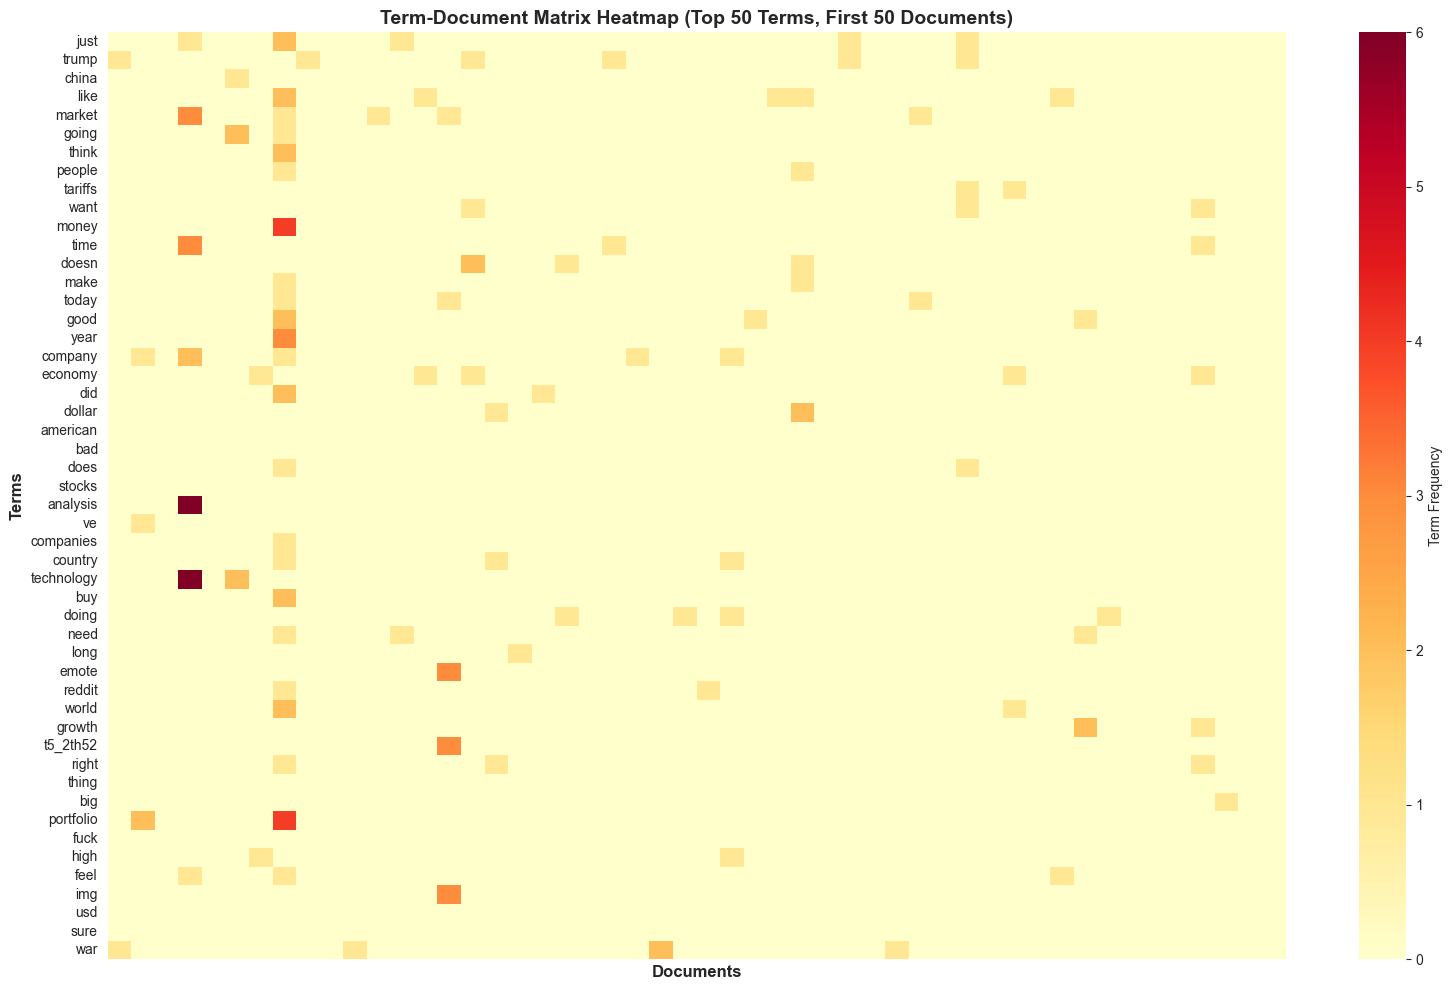

In [18]:
# Create a heatmap visualization of term-document matrix (subset for visualization)
# Select top 50 terms and a subset of documents
n_terms = 50
n_docs = 50

# Get indices of top terms
top_term_indices = term_freq_df.head(n_terms).index.tolist()

# Create subset of the matrix
subset_matrix = term_doc_matrix[:n_docs, top_term_indices].toarray()

# Create heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(subset_matrix.T, 
            cmap='YlOrRd', 
            xticklabels=False,
            yticklabels=term_freq_df.head(n_terms)['term'].values,
            cbar_kws={'label': 'Term Frequency'})
plt.xlabel('Documents', fontsize=12, fontweight='bold')
plt.ylabel('Terms', fontsize=12, fontweight='bold')
plt.title(f'Term-Document Matrix Heatmap (Top {n_terms} Terms, First {n_docs} Documents)', 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 9. Additional Visualizations - Sentiment Analysis

In [19]:
# Analyze term frequencies by sentiment category
sentiment_labels = {-1.0: 'Negative', 0.0: 'Neutral', 1.0: 'Positive'}

# Create term-document matrices for each sentiment
sentiment_term_freq = {}

for label_val, label_name in sentiment_labels.items():
    # Filter data by sentiment
    sentiment_data = df_sample[df_sample['label'] == label_val]['text']
    
    # Create term-document matrix for this sentiment
    sentiment_matrix = vectorizer.transform(sentiment_data)
    
    # Calculate term frequencies
    term_freq = np.asarray(sentiment_matrix.sum(axis=0)).flatten()
    
    sentiment_term_freq[label_name] = term_freq

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'term': feature_names,
    'Negative': sentiment_term_freq['Negative'],
    'Neutral': sentiment_term_freq['Neutral'],
    'Positive': sentiment_term_freq['Positive']
})

# Show top terms for each sentiment
print("Top 10 terms by sentiment category:\n")
for sentiment in ['Negative', 'Neutral', 'Positive']:
    print(f"{sentiment}:")
    top_sentiment = comparison_df.nlargest(10, sentiment)[['term', sentiment]]
    print(top_sentiment.to_string(index=False))
    print()

Top 10 terms by sentiment category:

Negative:
    term  Negative
   trump        20
   china        14
    just        13
  market        10
  people        10
    like         9
   think         9
   doesn         8
american         7
   going         7

Neutral:
  term  Neutral
  just       15
  like       10
  year        9
 china        8
   did        8
  does        8
stocks        8
  want        8
 going        7
 money        7

Positive:
      term  Positive
technology         8
  analysis         6
      data         5
   economy         5
    market         5
    safety         5
    better         4
   company         4
   gaining         4
      good         4



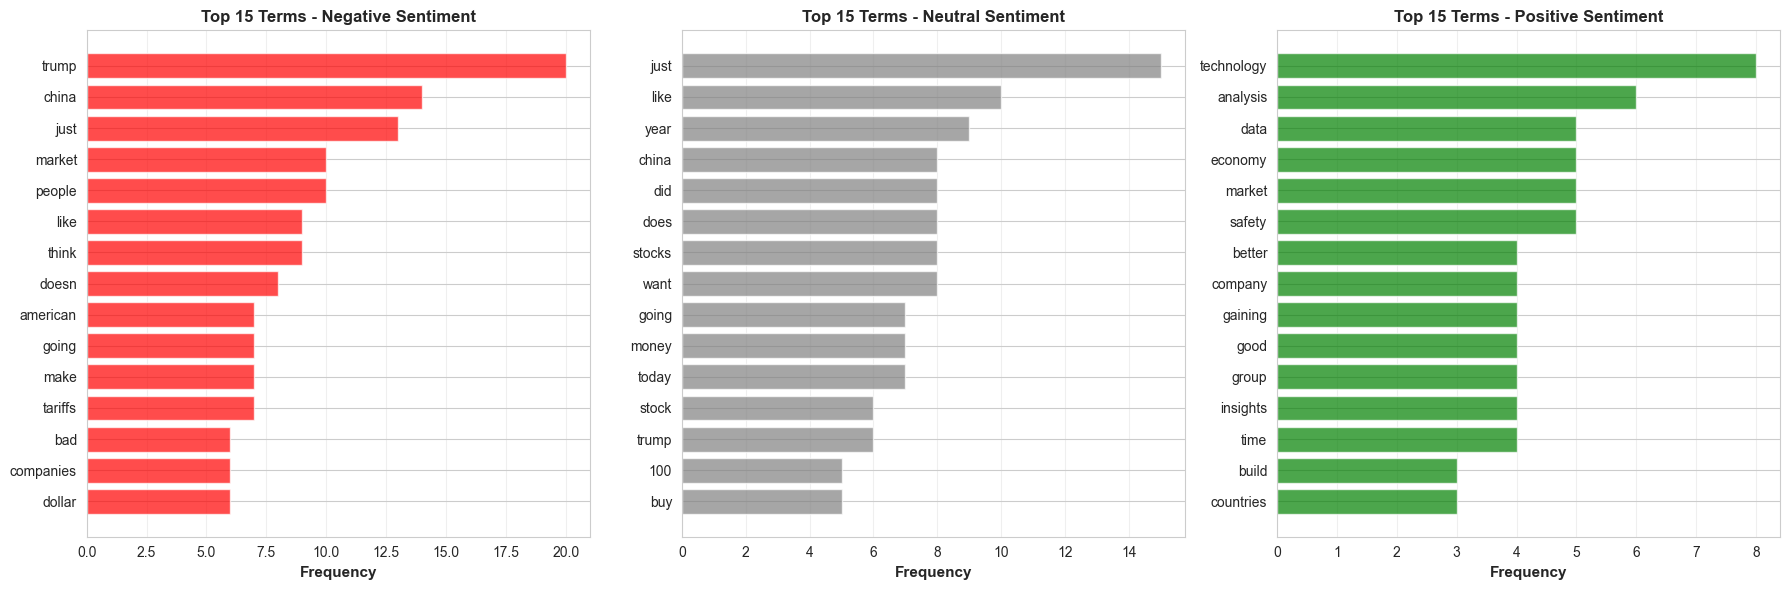

In [20]:
# Visualize top terms comparison across sentiments
n_top = 15

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, (sentiment, ax) in enumerate(zip(['Negative', 'Neutral', 'Positive'], axes)):
    top_data = comparison_df.nlargest(n_top, sentiment)
    
    ax.barh(range(n_top), top_data[sentiment].values, color=['red', 'gray', 'green'][idx], alpha=0.7)
    ax.set_yticks(range(n_top))
    ax.set_yticklabels(top_data['term'].values)
    ax.invert_yaxis()
    ax.set_xlabel('Frequency', fontsize=11, fontweight='bold')
    ax.set_title(f'Top {n_top} Terms - {sentiment} Sentiment', fontsize=12, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

## 10. Text Length Analysis by Sentiment

Text statistics by sentiment:

      text_length                    word_count                  
             mean median         std       mean median        std
label                                                            
-1.0   156.340426  104.0  152.682083  28.191489   18.5  26.633424
 0.0   135.290598   57.0  342.983413  23.299145    9.0  58.566388
 1.0   195.444444   83.0  418.097558  31.972222   13.5  57.328370


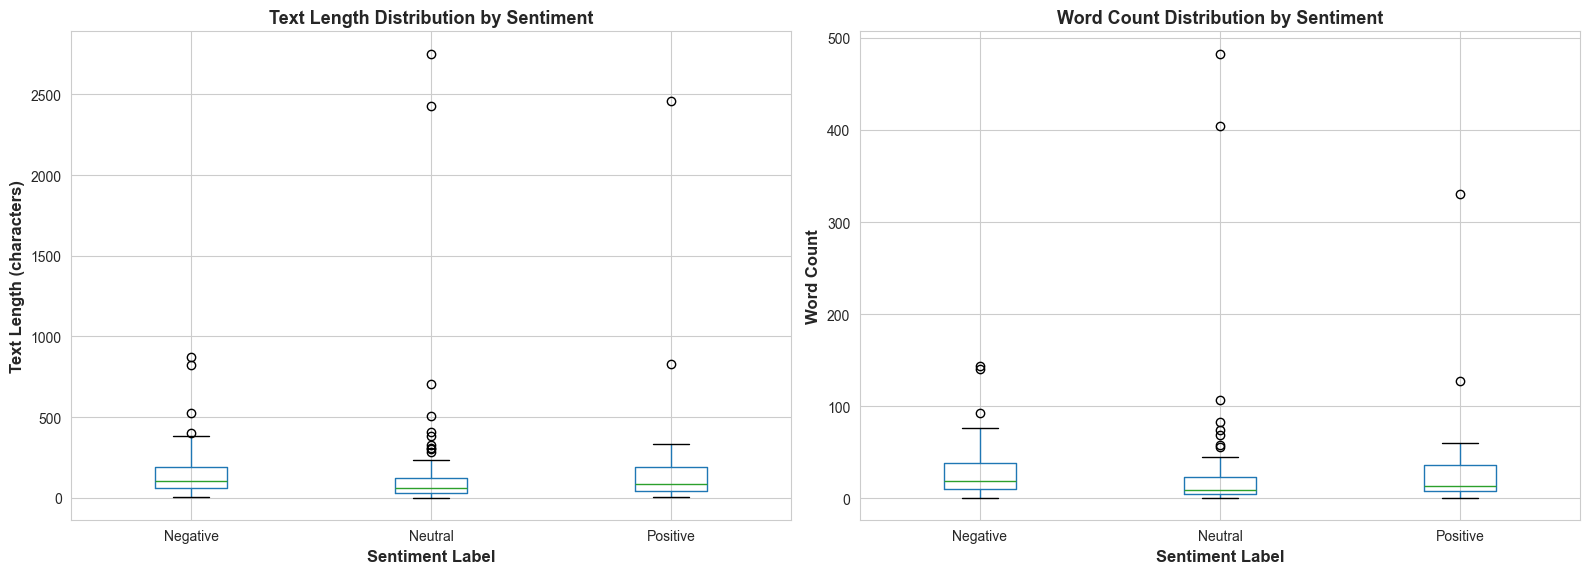

In [21]:
# Analyze text length by sentiment
df_sample['text_length'] = df_sample['text'].apply(len)
df_sample['word_count'] = df_sample['text'].apply(lambda x: len(str(x).split()))

# Statistics by sentiment
print("Text statistics by sentiment:\n")
sentiment_stats = df_sample.groupby('label')[['text_length', 'word_count']].agg(['mean', 'median', 'std'])
print(sentiment_stats)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Box plot for text length
df_sample.boxplot(column='text_length', by='label', ax=axes[0])
axes[0].set_xlabel('Sentiment Label', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Text Length (characters)', fontsize=12, fontweight='bold')
axes[0].set_title('Text Length Distribution by Sentiment', fontsize=13, fontweight='bold')
axes[0].set_xticklabels(['Negative', 'Neutral', 'Positive'])
plt.sca(axes[0])
plt.xticks([1, 2, 3], ['Negative', 'Neutral', 'Positive'])

# Box plot for word count
df_sample.boxplot(column='word_count', by='label', ax=axes[1])
axes[1].set_xlabel('Sentiment Label', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Word Count', fontsize=12, fontweight='bold')
axes[1].set_title('Word Count Distribution by Sentiment', fontsize=13, fontweight='bold')
axes[1].set_xticklabels(['Negative', 'Neutral', 'Positive'])
plt.sca(axes[1])
plt.xticks([1, 2, 3], ['Negative', 'Neutral', 'Positive'])

plt.suptitle('')  # Remove auto-generated suptitle
plt.tight_layout()
plt.show()

## 11. Subreddit Distribution Analysis

Subreddit distribution in sample:
subreddit
StockMarket         82
stocks              73
wallstreetbets      47
stockstobuytoday    45
Name: count, dtype: int64


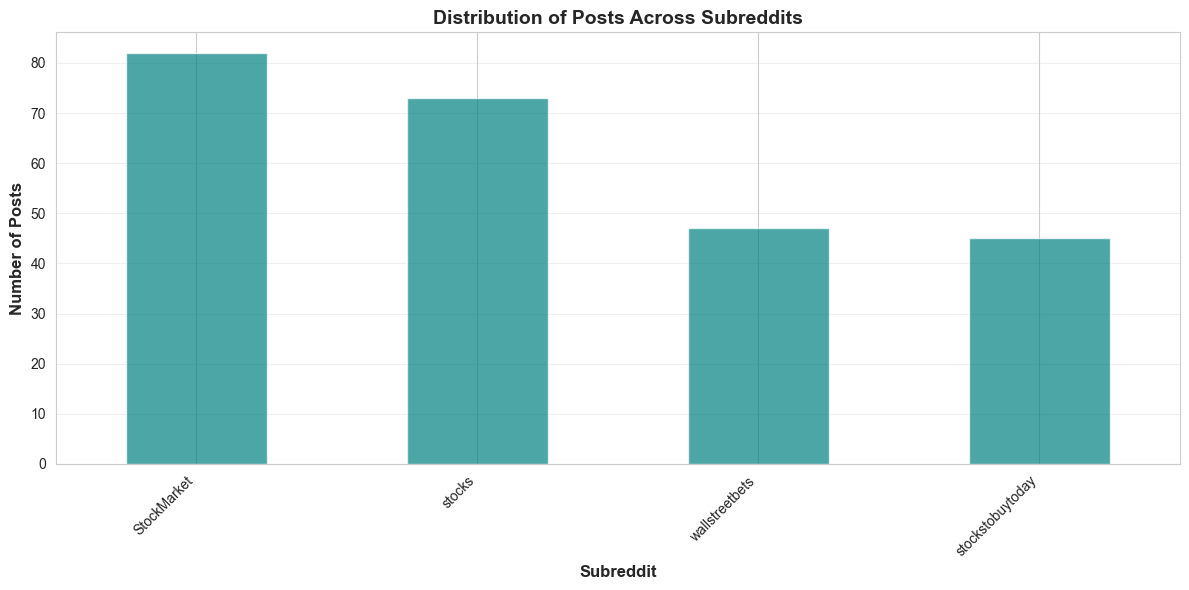

In [22]:
# Analyze subreddit distribution
print("Subreddit distribution in sample:")
subreddit_counts = df_sample['subreddit'].value_counts()
print(subreddit_counts)

# Visualize subreddit distribution
plt.figure(figsize=(12, 6))
subreddit_counts.plot(kind='bar', color='teal', alpha=0.7)
plt.xlabel('Subreddit', fontsize=12, fontweight='bold')
plt.ylabel('Number of Posts', fontsize=12, fontweight='bold')
plt.title('Distribution of Posts Across Subreddits', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

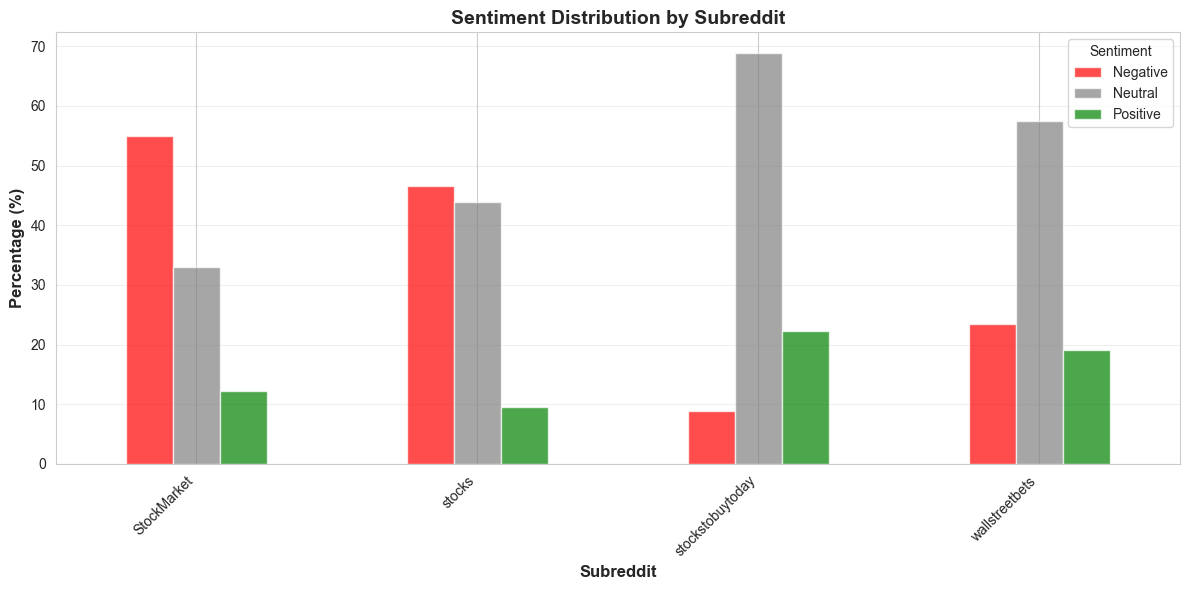

In [23]:
# Sentiment distribution by subreddit
sentiment_by_subreddit = pd.crosstab(df_sample['subreddit'], df_sample['label'], normalize='index') * 100

plt.figure(figsize=(12, 6))
sentiment_by_subreddit.plot(kind='bar', stacked=False, 
                            color=['red', 'gray', 'green'], 
                            alpha=0.7, 
                            figsize=(12, 6))
plt.xlabel('Subreddit', fontsize=12, fontweight='bold')
plt.ylabel('Percentage (%)', fontsize=12, fontweight='bold')
plt.title('Sentiment Distribution by Subreddit', fontsize=14, fontweight='bold')
plt.legend(['Negative', 'Neutral', 'Positive'], title='Sentiment')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 12. Summary Statistics

In [24]:
print("="*80)
print("PHASE 1 SUMMARY - Reddit Stock Sentiment Analysis")
print("="*80)

print(f"\n1. DATASET OVERVIEW:")
print(f"   - Original dataset size: {len(df)}")
print(f"   - After cleaning (removing missing/duplicates): {len(df_clean)}")
print(f"   - Sample dataset size (30%): {len(df_sample)}")

print(f"\n2. SENTIMENT DISTRIBUTION:")
for label_val, label_name in sentiment_labels.items():
    count = (df_sample['label'] == label_val).sum()
    percentage = (count / len(df_sample)) * 100
    print(f"   - {label_name}: {count} ({percentage:.1f}%)")

print(f"\n3. VOCABULARY AND FEATURES:")
print(f"   - Total vocabulary size: {len(feature_names)}")
print(f"   - Matrix sparsity: {term_doc_matrix.nnz / (term_doc_matrix.shape[0] * term_doc_matrix.shape[1]) * 100:.2f}% non-zero")

print(f"\n4. TOP 10 MOST FREQUENT TERMS:")
for idx, row in term_freq_df.head(10).iterrows():
    print(f"   {idx+1:2d}. {row['term']:15s} (frequency: {int(row['frequency'])})")

print(f"\n5. TEXT STATISTICS:")
print(f"   - Average text length: {df_sample['text_length'].mean():.1f} characters")
print(f"   - Average word count: {df_sample['word_count'].mean():.1f} words")

print(f"\n6. SUBREDDIT DISTRIBUTION:")
for subreddit, count in subreddit_counts.head(5).items():
    percentage = (count / len(df_sample)) * 100
    print(f"   - {subreddit}: {count} ({percentage:.1f}%)")

print("\n" + "="*80)
print("Phase 1 completed successfully!")
print("="*80)

PHASE 1 SUMMARY - Reddit Stock Sentiment Analysis

1. DATASET OVERVIEW:
   - Original dataset size: 847
   - After cleaning (removing missing/duplicates): 824
   - Sample dataset size (30%): 247

2. SENTIMENT DISTRIBUTION:
   - Negative: 94 (38.1%)
   - Neutral: 117 (47.4%)
   - Positive: 36 (14.6%)

3. VOCABULARY AND FEATURES:
   - Total vocabulary size: 473
   - Matrix sparsity: 1.34% non-zero

4. TOP 10 MOST FREQUENT TERMS:
   216. just            (frequency: 31)
   426. trump           (frequency: 27)
   62. china           (frequency: 24)
   229. like            (frequency: 21)
   253. market          (frequency: 19)
   167. going           (frequency: 17)
   409. think           (frequency: 15)
   286. people          (frequency: 14)
   397. tariffs         (frequency: 14)
   442. want            (frequency: 13)

5. TEXT STATISTICS:
   - Average text length: 152.1 characters
   - Average word count: 26.4 words

6. SUBREDDIT DISTRIBUTION:
   - StockMarket: 82 (33.2%)
   - stocks: 

# Phase 2

In [25]:
### Begin Assignment Here